# Lars with Scale & Polynomial Features

This Code template is for the regression analysis using a Lars Regressor and the feature rescaling technique Normalize along with PolynomialFeatures as a feature transformation technique in a pipeline

### Required Packages

In [309]:
import warnings as wr
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lars
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
wr.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [310]:
#filepath
file_path= ""

List of features which are  required for model training .

In [311]:
#x_values
features=[]

Target feature for prediction.

In [312]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [313]:
df=pd.read_csv(file_path) #reading file
df.head()#displaying initial entries

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [314]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 5000 ,and number of columns are : 14


In [315]:
df.columns.tolist()


['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [316]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

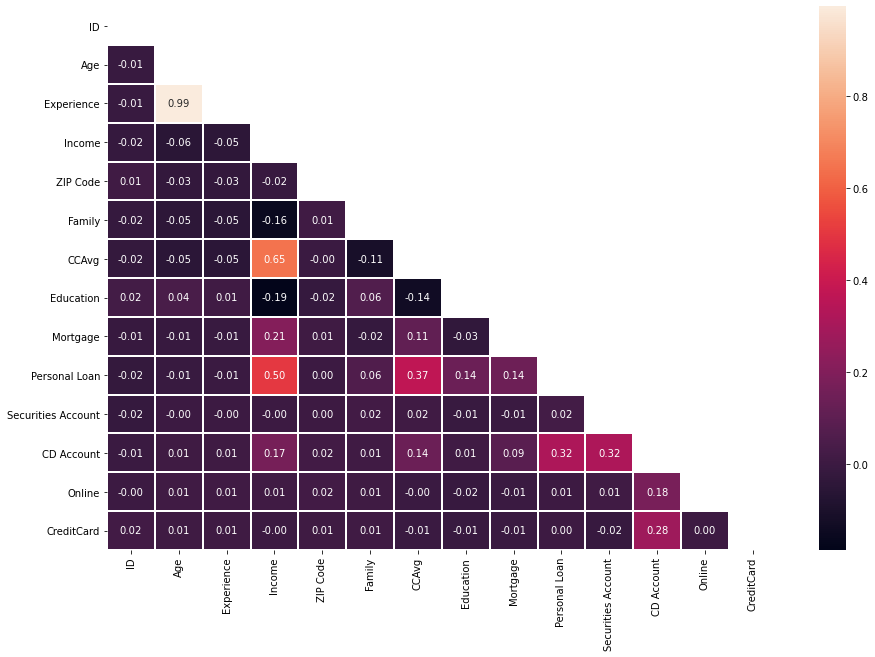

In [317]:
plt.figure(figsize = (15, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [318]:
correlation = df[df.columns[1:]].corr()[target][:]
correlation

Age                  -0.055269
Experience           -0.046574
Income                1.000000
ZIP Code             -0.016410
Family               -0.157501
CCAvg                 0.645984
Education            -0.187524
Mortgage              0.206806
Personal Loan         0.502462
Securities Account   -0.002616
CD Account            0.169738
Online                0.014206
CreditCard           -0.002385
Name: Income, dtype: float64

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [319]:
#spliting data into X(features) and Y(Target)

X=df[features]
Y=df[target]  

Calling preprocessing functions on the feature and target set.

In [320]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,Experience,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,1,1.6,1,0,0,1,0,0
1,19,1.5,1,0,0,1,0,0
2,15,1.0,1,0,0,0,0,0
3,9,2.7,2,0,0,0,0,0
4,8,1.0,2,0,0,0,0,1


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [321]:
#we can choose randomstate and test_size as over requerment
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) #performing datasplitting


## Data Rescaling
### Normalize: 
Normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

[For more information](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

In [322]:
from sklearn import preprocessing
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)



### Feature Transformation

Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">More about PolynomialFeatures module</a>

## Model
**Least-angle regression (LARS)**

Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

**Model Tuning Parameters**

* jitter -> Upper bound on a uniform noise parameter to be added to the y values, to satisfy the model’s assumption of one-at-a-time computations. Might help with stability.

* eps -> The machine-precision regularization in the computation of the Cholesky diagonal factors. Increase this for very ill-conditioned systems. Unlike the tol parameter in some iterative optimization-based algorithms, this parameter does not control the tolerance of the optimization.

* n_nonzero_coefs -> Target number of non-zero coefficients. Use np.inf for no limit.

* precompute -> Whether to use a precomputed Gram matrix to speed up calculations.

In [323]:
#training the Lars

model = make_pipeline(PolynomialFeatures(degree = 1),Lars(random_state=12))
model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('lars', Lars(random_state=12))])

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [324]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 27.83 %



In [325]:
#prediction on testing set
prediction=model.predict(X_test)

### Model evolution


**r2_score:** The r2_score function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.

**MAE:** The mean abosolute error function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.

**MSE:** The mean squared error function squares the error(penalizes the model for large errors) by our model.

In [326]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error: 31.464663517154666
Mean Squared Error: 1529.8223291927236
Root Mean Squared Error: 39.112943243800046


In [327]:
print("R-squared score : ",r2_score(y_test,prediction))

R-squared score :  0.2783431772972268


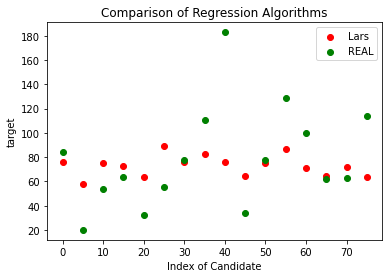

In [328]:
#ploting actual and predicted
red = plt.scatter(np.arange(0,80,5),prediction[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "green")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("target")
plt.legend((red,green),('Lars', 'REAL'))
plt.show()


### Prediction Plot
First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis. For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

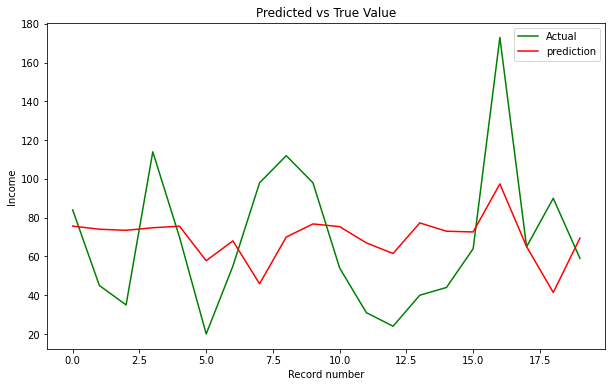

In [329]:
plt.figure(figsize=(10,6))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Neel Pawar, Github: [Profile]( https://github.com/neel-ntp)
